# Ising model

We use the Metropolis algorithm to simulate the Ising model for a square with free and with fixed boundary values.

https://en.wikipedia.org/wiki/Ising_model

https://en.wikipedia.org/wiki/Metropolis%E2%80%93Hastings_algorithm


We fix a lattice $L$. A configuration is a mapping $\sigma:L\to \{-1,1\}$, which attaches a spin $\sigma_x \in \{-1,1\}$ to each vertex $x\in L$. Let $\Sigma$ be the set of all such configurations. Then a configuration is chosen randomly as follows:

For $\sigma\in \Sigma$ we define its energy die $H(\sigma)$ by
$$
H(\sigma) = -J\sum_{x\sim y} \sigma_x\sigma_y - B \sum_{x} \sigma_x, \quad J>0, B\geq 0,
$$
where we sum over all edges in $L$. The value $B$ stands for an external magnet field and $J$  describes the coupling of connected vertices.

Let $T>0$ be the absolute temperature and $Z_{T}$ the partition function ("Zustandssumme")
$$Z_{T} = \sum_{\sigma \in \Sigma} e^{-\beta H(\sigma)},$$
where $\beta = \frac1{k_B T},$ and $k_B$ is the Boltzmann constant.

The probability for $\sigma \in \Sigma$ is now given by
$$\mathbb{P}_{T}\{\sigma\} = \frac1{Z_{T}}e^{-\beta H(\sigma)}.$$


First, load some packages:

In [0]:
import numpy                as np
import matplotlib.pylab as plt

The function ```plot_Ising(beta, N)``` simulates and plots an Ising model on a square $N\times N$ lattice. The value ```beta``` is $\beta$ from the model described above. 

The critical value for $\beta$ is given by $\beta_c = 1/2\cdot\log{(\sqrt{2}+1)}$.

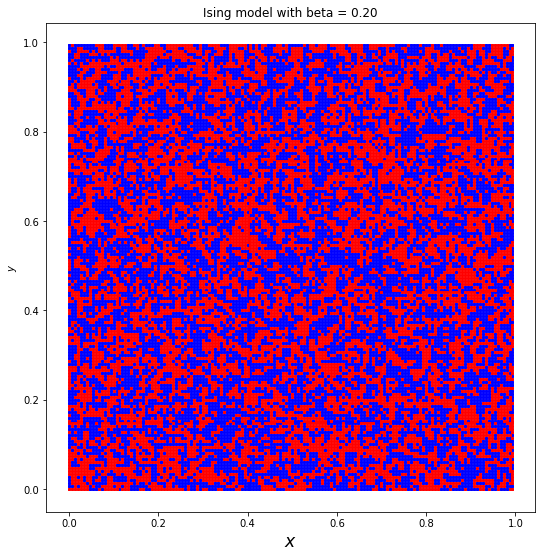

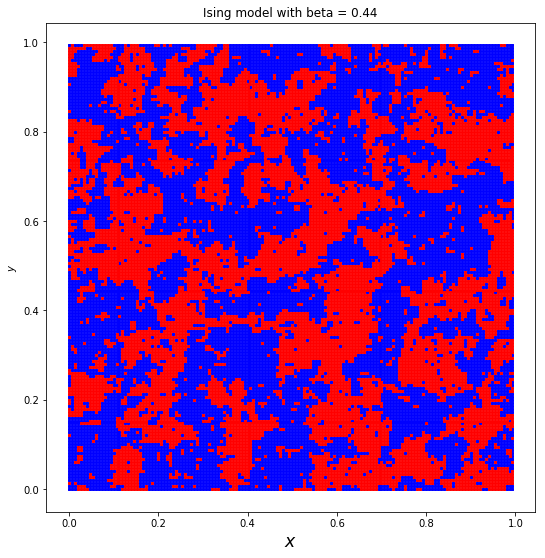

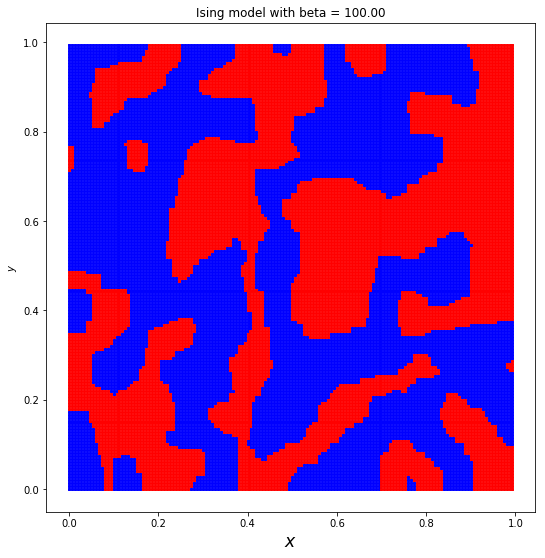

In [2]:
def plot_Ising(beta, N = 150):  # values for N with adjusted plot marker size: 100, 150, 200
    M = np.zeros([N,N])
    # inverse temperatur beta = 1/(Boltzman constant * temperature), 
    # critical value beta_C = 1/2*np.log(np.sqrt(2)+1)

    flips = 0
    HMagnet = 0 # external magnet field


    for k in range(N):
        for l in range(N):
            p = np.random.uniform(0,1)
            if p < 0.5:
                M[k,l] = 1
            else:
                M[k,l] = -1 


    # Metropolis
    for i in range(1000000):
    # choose random spin
        k0 = np.random.randint(low=0, high=N)
        l0 = np.random.randint(low=0, high=N)

    #  flip it           
        MNew =  M[k0,l0] * -1        
    # energy difference  H = new - old
        H = 0
        if k0 > 0:
            H = H + -1 * M[k0-1,l0] * MNew  - (-1 * M[k0-1,l0] * M[k0,l0])  

        if k0 < N-1:
            H = H + -1 * M[k0+1,l0] * MNew  - (-1 * M[k0+1,l0] * M[k0,l0])  

        if l0 > 0:
            H = H + -1 * M[k0,l0-1] * MNew  - (-1 * M[k0,l0-1] * M[k0,l0])  

        if l0 < N-1:
            H = H + -1 * M[k0,l0+1] * MNew  - (-1 * M[k0,l0+1] * M[k0,l0])  
        
        H = H + (-HMagnet * (MNew - M[k0,l0]))
    
        if H <= 0:
            M[k0, l0] = MNew
            flips = flips +1
        else:
            p = np.random.uniform(0,1)
            if p  < np.exp(-beta * H):
                M[k0, l0] = MNew
                flips = flips +1

    blue_points_x = []
    blue_points_y = []
    red_points_x = []
    red_points_y = []
    for k in range(N):
        for l in range(N):
            if M[k, l] == 1:
                blue_points_x.append(k/N)
                blue_points_y.append(l/N)
            else:
                red_points_x.append(k/N)
                red_points_y.append(l/N)
    
  
    if N == 100:
        s = 12*800/(N*np.sqrt(N))
        fig_size = 7 
    if N == 150:
        s = 3*800/(N*np.sqrt(N))
        fig_size = 9 
    if N == 200:
        s = 4*800/(N*np.sqrt(N))
        fig_size = 12  

    plt.figure(figsize=(fig_size,fig_size)) 
    plt.scatter(blue_points_x, blue_points_y, s=s, marker='s', color=[0,0,1])
    plt.scatter(red_points_x, red_points_y, s=s, marker='s', color=[1,0,0])

    ax = plt.gca()
    ax.set_aspect('equal')
    ax.set_title('Ising model with beta = {:.2f}'.format(beta))
    ax.set_xlabel('$x$', fontsize='xx-large')
    ax.set_ylabel('$y$')
    ax.set_alpha(0.0)
    plt.show()
    
plot_Ising(beta = 0.2)
plot_Ising(beta = 1/2*np.log(np.sqrt(2)+1))
plot_Ising(beta = 100)

#Ising model with fixed boundary values



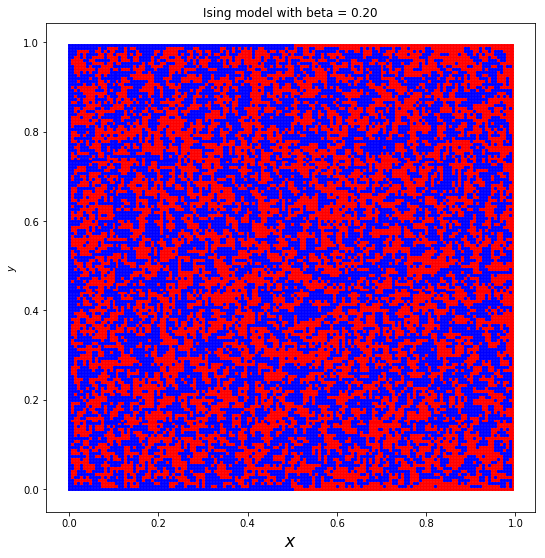

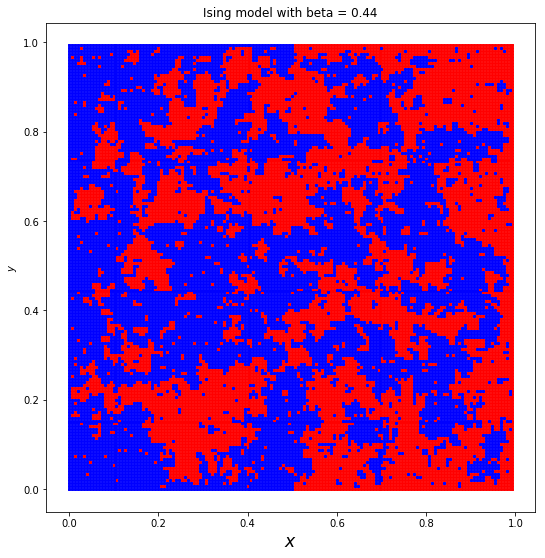

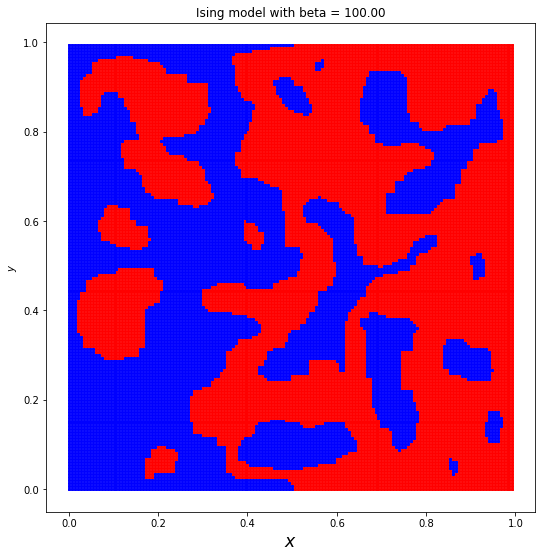

In [3]:
## No external magnetic field

def plot_Ising_boundary(beta, N = 150): # values with adjusted plot marker size: 100, 150, 200
    
    M = np.zeros([N,N])
    # inverse temperatur beta = 1/(Boltzman constant * temperature), 
    # critical value beta_C = 1/2*np.log(np.sqrt(2)+1)
    flips = 0

    for k in range(N):
        for l in range(N):
            p = np.random.uniform(0,1)
            if p < 0.5:
                M[k,l] = 1
            else:
                M[k,l] = -1 
 

    # Fix boundary values: left side +1, right side -1
    for l in range(N):
        M[0,l] = 1
        M[N-1,l] = -1

    for k in range(N):
        if k < N/2+1:
             M[k,0] = 1
             M[k,N-1] = 1
        else:
            M[k,0] = -1
            M[k,N-1] = -1 

    #================
    # add additional switches on the boundary
    #for k in range(20):
       # M[50+k-10,0] = -1
       # M[50+k+10,0] = 1

    #for k in range(20):
       # M[50+k-10,N-1] = -1
       # M[50+k+10,N-1] = 1        
    #=================        
        

    # Metropolis
    for i in range(1000000):
    # choose random spin
        k0 = np.random.randint(low=1, high=N-1)
        l0 = np.random.randint(low=1, high=N-1)

    #  flip it           
        MNew =  M[k0,l0] * -1        
    # energy difference  H = new - old
        H = 0
        if k0 > 0:
            H = H + -1 * M[k0-1,l0] * MNew  - (-1 * M[k0-1,l0] * M[k0,l0])  

        if k0 < N-1:
            H = H + -1 * M[k0+1,l0] * MNew  - (-1 * M[k0+1,l0] * M[k0,l0])  

        if l0 > 0:
            H = H + -1 * M[k0,l0-1] * MNew  - (-1 * M[k0,l0-1] * M[k0,l0])  

        if l0 < N-1:
            H = H + -1 * M[k0,l0+1] * MNew  - (-1 * M[k0,l0+1] * M[k0,l0])  
    
        if H <= 0:
            M[k0, l0] = MNew
            flips = flips +1
        else:
            p = np.random.uniform(0,1)
            if p  < np.exp(-beta * H):
                M[k0, l0] = MNew
                flips = flips +1

    blue_points_x = []
    blue_points_y = []
    red_points_x = []
    red_points_y = []
    for k in range(N):
        for l in range(N):
            if M[k, l] == 1:
                blue_points_x.append(k/N)
                blue_points_y.append(l/N)
            else:
                red_points_x.append(k/N)
                red_points_y.append(l/N)
    
    s = 10  
    fig_size = 8
    if N == 100:
        s = 12*800/(N*np.sqrt(N))
        fig_size = 7 
    if N == 150:
        s = 3*800/(N*np.sqrt(N))
        fig_size = 9 
    if N == 200:
        s = 4*800/(N*np.sqrt(N))
        fig_size = 12  

    plt.figure(figsize=(fig_size,fig_size)) 
    plt.scatter(red_points_x, red_points_y, s=s, marker='s', color=[1,0,0])
    plt.scatter(blue_points_x, blue_points_y, s=s, marker='s', color=[0,0,1])

    ax = plt.gca()
    ax.set_aspect('equal')
    ax.set_title('Ising model with beta = {:.2f}'.format(beta))
    ax.set_xlabel('$x$', fontsize='xx-large')
    ax.set_ylabel('$y$')
    #ax.fill_between(result2.real, result2.imag, color=col[:,0])
    ax.set_alpha(0.0)
    plt.show()

plot_Ising_boundary(beta = 0.2)
plot_Ising_boundary(beta = 1/2*np.log(np.sqrt(2)+1))
plot_Ising_boundary(beta = 100)